<a href="https://colab.research.google.com/drive/1VZ8Ut29ifDkfsDOa6D4gRSiIXGOOLciF" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center> Basics of Linear Algebra </center></h1>

Linear algebra is the branch of mathematics that focuses on linear equations. It is often applied to the science and engineering fields, specifically machine learning. Linear algebra is also central to almost all areas of mathematics like geometry and functional analysis. The concepts of linear algebra are crucial for understanding the theory behind machine learning, especially deep learning. They give you better intuition for how algorithms work under the hood, which enables you to make better decisions. 

In linear algebra, data is represented by linear equations, which are presented in the form of matrices and vectors. Therefore, you are mostly dealing with matrices and vectors rather than with scalars. 

In the following, we will go through the main basic concepts of linear algebra that will repeatedly appear throughout the topics of this module. 

### Table of Contents 

1. [Vectors](#section1)
    1. [Magnitude of a Vector](#section_1_1)
   
    2. [Dot Product](#section_1_2)

    3. [Cross Product](#section_1_3)

    4. [Vector Norms](#section_1_4)

1. [Matrices](#section2) 

    1. [Matrices Operations](#section_2_1) 

    3. [Eigen-Decomposition](#section_2_2)

1. [Tensors](#section3) 

1. [System of Linear Equations](#section4)

    1. [Solving a System of Lienar Equations](#section_4_1) 

*******************************************************************************************

## $\color{Blue}{\text{Vectors}}$ <a class="anchor" id="section1"></a>

In [4]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#create a vector
x = np.array([25, 2, 5])

#display the length of the vector
print(len(x))

#display the shape of the vector
print(x.shape)

#select certain elements 
print(x[0]) #zero-indexed

3
(3,)
25


### Magnitude of a Vector <a id="section_1_1"></a>

The magnitude of vector ${\bf{A}}=(A_x,A_y,A_z)$ is calculated as follows:

$$
||{\bf{A}}|| = \sqrt{A_x^2+A_y^2+A_z^2}
$$

<img src="Vectors.png" style="width: 700px;"/>

In [6]:
#method 1
mag1 = np.linalg.norm(x)

#method 2
mag2 = np.sqrt(x[0]**2+x[1]**2+x[2]**2)

print(mag1)
print(mag2)

25.573423705088842
25.573423705088842


### Dot Product <a id="section_1_2"></a>

The dot product of vectors ${\bf{A}}=(A_x,A_y,A_z)$ and ${\bf{B}}=(B_x,B_y,B_z)$ with an angle $\theta$ between them is calculated as follows:

$$
{\bf{A}} \cdot {\bf{B}} = ||{\bf{A}}|| \cdot ||{\bf{B}}|| \cdot \cos{\theta}
$$

The dot product can also be evaluated using the components of each vector, i.e., 

$$
{\bf{A}} \cdot {\bf{B}} = A_x \cdot B_x + A_y \cdot B_y +A_z \cdot B_z
$$

Both Methods are equivalent.

<img src="DotProductTypes.png" style="width: 700px;"/>

In [7]:
#create a second vector
y = np.array([2, 10, 13])

#calculate the dot product of x and y
#method 1
dot1 = np.dot(x, y)

#method 2
dot2 = x[0]*y[0]+x[1]*y[1]+x[2]*y[2]

print(dot1) 
print(dot2) 

135
135


In [8]:
#orthogonal vectors
#remember that if dot = 0, then x and y are orthogonal vectors and the angle between them is 90
#vector 1
i = np.array([1, 0])
#vector 2
j = np.array([0, 1])
#calculate the dot product
dot_ij = np.dot(i, j)
print(dot_ij)

0


### Cross Product <a id="section_1_3"></a>

The cross product of vectors ${\bf{A}}=(A_x,A_y,A_z)$ and ${\bf{B}}=(B_x,B_y,B_z)$ with an angle $\theta$ between them is calculated as follows:

$$
{\bf{C}} = {\bf{A}} \times {\bf{B}} = ||{\bf{A}}|| ||{\bf{B}}|| \cdot \sin{\theta} \hat{n}
$$

The cross product can also be evaluated using the components of each vector, i.e., 

\begin{align}
{\bf{C}} = {\bf{A}} \times {\bf{B}} = & 
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k}  \\ 
A_x & A_y & A_z \\
B_x & B_y & B_z
\end{vmatrix} =
\begin{vmatrix}
A_y & A_z \\
B_y & B_z
\end{vmatrix} \hat{i} - 
\begin{vmatrix}
A_x & A_z \\
B_x & B_z
\end{vmatrix} \hat{j} +
\begin{vmatrix}
A_x & A_y \\
B_x & B_y
\end{vmatrix} \hat{k} 
\label{CrossProductMethod2}
\end{align}

Both Methods are equivalent.

<img src="CrossProduct.png" style="width: 400px;"/>


In [9]:
#calculate the cross prodcut of x and y
cross = np.cross(x,y)
print(cross) #rememebr that if cross=0, then x and y are parallel to each other and the angle between them is 0

[ -24 -315  246]


### Vector Norms <a id="section_1_4"></a>
Vector Norms are defined as a set of functions that take a vector as an input and output a positive value against it. All norm functions originate from a standard equation of Norm, known as the p-norm. We obtain a different norm function for different values of the parameter $p$ ($p$ should be a real number greater than or equal to $1$). The generalized equation, however, is shown below:

\begin{equation}
\underbrace{\parallel{\bf{x}}\parallel_p}_{\text{$p$-Norm}} = \left(\sum_i^n |{\bf{x}}_i|^p\right)^{\frac{1}{p}}=\left(|{\bf{x}}_1|^p+|{\bf{x}}_2|^p+ \cdots + |{\bf{x}}_n|^p\right)^{\frac{1}{p}}
    \label{pNormEquation}
\end{equation}

This takes an $n$-dimensional vector ${\bf{x}}$ and raises each element to its $p$-th power. Then, we sum all the obtained elements and take the $p$-th root to get the $p$-norm of the vector, also known as its magnitude. Now, with different values of the parameter $p$, we will obtain a different norm function. 

#### L0 Norm
The L0 nrom returns the number of non-zero elements in the given vector.

In [10]:
#define a vector
a = np.array([1, 2, 3])
#show it
print(a)

#count the number of the nonzero elements in the vector to compute the L0 norm
L0norm = np.linalg.norm(a, 0) #or L0norm = sum(~np.isnan(a))
#show it
print(L0norm)

[1 2 3]
3.0


#### L1 Norm

\begin{equation}
\underbrace{\parallel{\bf{x}}\parallel_1}_{\text{$L1$-Norm}} = \left(\sum_i^n |{\bf{x}}_i|\right)=\left(|{\bf{x}}_1|+|{\bf{x}}_2|+ \cdots + |{\bf{x}}_n|\right)
    \label{L1Norm}
\end{equation}

In [11]:
#define a vector
a = np.array([1, 2, 3])
#show it
print(a)

#compute the L1 norm
l1norm = np.linalg.norm(a, 1)
#show it
print(l1norm)


[1 2 3]
6.0


#### L2 Norm

\begin{equation}
\underbrace{\parallel{\bf{x}}\parallel_2}_{\text{$L2$-Norm}} = \left(\sum_i^n |{\bf{x}}_i|^2\right)^{\frac{1}{2}}=\left(|{\bf{x}}_1|^2+|{\bf{x}}_2|^2+ \cdots + |{\bf{x}}_n|^2\right)^{\frac{1}{2}}
    \label{L2Norm}
\end{equation}

In [12]:
#define a vector
a = np.array([1, 2, 3])
#show it
print(a)

#compute the L1 norm
l2norm = np.linalg.norm(a, 2) #or l2 = np.linalg.norm(a)
#show it
print(l2norm)

[1 2 3]
3.7416573867739413


#### Squared L2 Norm

\begin{equation}
\underbrace{\parallel{\bf{x}}\parallel_2^2}_{\text{Squared $L2$-Norm}} = \left(\sum_i^n |{\bf{x}}_i|^2\right)=\left(|{\bf{x}}_1|^2+|{\bf{x}}_2|^2+ \cdots + |{\bf{x}}_n|^2\right)
    \label{SquaredL2Norm}
\end{equation}

In [13]:
#define a vector
a = np.array([1, 2, 3])
#show it
print(a)

#compute the squared L2 norm
Squaredl2norm = np.linalg.norm(a, 2)**2 #or l2 = np.linalg.norm(a)**2
#show it
print(Squaredl2norm)

[1 2 3]
14.0


#### Max Norm
The max norm returns the absolute value of the largest magnitude element.

In [14]:
#define a vector
a = np.array([1, 2, 3])
#show it
print(a)

#compute the max norm
maxnorm = np.linalg.norm(a, np.inf)
#show it
print(maxnorm)

[1 2 3]
3.0


********************************************************************************

## $\color{Blue}{\text {Matrices}}$ <a class="anchor" id="section2"></a>


In [15]:
# Use array() with nested brackets:
X = np.array([[25, 2], [5, 26], [3, 7]])
print('Matrix X is', X)

#show the shape of the matrix
print('The shape of the matrix X is ',X.shape)

#show the size of the matrix
print('The size of the matrix X is ',X.size)

# Select left column of matrix X (zero-indexed)
print('Th left column of matrix X is ',X[:,0])

# Select middle row of matrix X:
print('The middle row of matrix X is ',X[1,:])

# Another slicing-by-index example:
print('Slicing the first two columns and rows of matrix X ', X[0:2, 0:2])

Matrix X is [[25  2]
 [ 5 26]
 [ 3  7]]
The shape of the matrix X is  (3, 2)
The size of the matrix X is  6
Th left column of matrix X is  [25  5  3]
The middle row of matrix X is  [ 5 26]
Slicing the first two columns and rows of matrix X  [[25  2]
 [ 5 26]]


### Matrices Operations <a id="section_2_1"></a>

In [16]:
#Matrix A
A = np.array([[3, 4], [5, 6]])

#Matrix B
B = np.array([[1, 9], [2, 0]])

#Addition of A & B
print('A+B =',A+B)

#Subtraction of A from B
print('A-B =',A-B)

#Multiplication of A & B
print('AxB =',np.dot(A, B))

#Transpose of A 
print('Transpose(A) =',A.T)
#Transpose of B
print('Transpose(B) =',B.T)

#Determinant of A
print('det(A) = ',np.linalg.det(A))
#Determinant of B
print('det(B) = ',np.linalg.det(B))

#Inverse of A
print('Inverse of (A) = ',np.linalg.inv(A))
#Inverse of B
print('Inverse of (B) = ',np.linalg.inv(B))


A+B = [[ 4 13]
 [ 7  6]]
A-B = [[ 2 -5]
 [ 3  6]]
AxB = [[11 27]
 [17 45]]
Transpose(A) = [[3 5]
 [4 6]]
Transpose(B) = [[1 2]
 [9 0]]
det(A) =  -1.9999999999999971
det(B) =  -18.000000000000004
Inverse of (A) =  [[-3.   2. ]
 [ 2.5 -1.5]]
Inverse of (B) =  [[ 0.          0.5       ]
 [ 0.11111111 -0.05555556]]


### Eigen-Decomposition <a id="section_2_2"></a>

In [17]:
#Matrix A
A = np.array([[3, 4], [5, 6]])

#Compute the eigenvalues and eigenvectors of matrix A
E_values,E_vectors = np.linalg.eig(A)
#show the eigendecomposition of A
print('Eigenvalues of A are: ', E_values)
print('Eigenvectors of A are: ',E_vectors)

Eigenvalues of A are:  [-0.21699057  9.21699057]
Eigenvectors of A are:  [[-0.77925158 -0.54107946]
 [ 0.62671124 -0.84097147]]


********************************************************************************

## $\color{Blue} {\text{Tensors}}$ <a class="anchor" id="section3"></a>

In [18]:
#Create a tensor using numpy library
T = np.array([
  [[1,2,3],    [4,5,6],    [7,8,9]],
  [[11,12,13], [14,15,16], [17,18,19]],
  [[21,22,23], [24,25,26], [27,28,29]],
  ])
print(T.shape)
print(T)


(3, 3, 3)
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[11 12 13]
  [14 15 16]
  [17 18 19]]

 [[21 22 23]
  [24 25 26]
  [27 28 29]]]


In [19]:
#Define two tensors
T1 = np.array([
  [[1,2,3],    [4,5,6],    [7,8,9]],
  [[11,12,13], [14,15,16], [17,18,19]],
  [[21,22,23], [24,25,26], [27,28,29]],
  ])
T2 = np.array([
  [[1,2,3],    [4,5,6],    [7,8,9]],
  [[11,12,13], [14,15,16], [17,18,19]],
  [[21,22,23], [24,25,26], [27,28,29]],
  ])

#Tensors addition
TenAdd = T1 + T2
print('T1+T2 = ', TenAdd)

#Tensors subtraction
TenSub = T1 - T2
print('T1-T2 = ', TenSub)

#Tensors Multiplication
TenMult1 = T1 * T2
print('T1*T2 = ', TenMult)

T1+T2 =  [[[ 2  4  6]
  [ 8 10 12]
  [14 16 18]]

 [[22 24 26]
  [28 30 32]
  [34 36 38]]

 [[42 44 46]
  [48 50 52]
  [54 56 58]]]
T1-T2 =  [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


NameError: name 'TenMult' is not defined

In [ ]:
#check the type of tensors created using Numpy library
type(T1), type(T2)

In [ ]:
# There are two libraries that can be used to convert the type of the previously defined tensors from being arrays to tensors.
# They are: Tensorflow and Pytorch. They convert NumPy arrays to tensors, and vice versa.

#PyTorch is ideal for research and small-scale projects prioritizing flexibility, experimentation and quick editing capabilities for models. 
#TensorFlow is ideal for large-scale projects and production environments that require high-performance and scalable models.
#Here we will be using PyTorch.

#Pytorch
#-------
# Import the Pytorch library
import torch
#If you need to install it: Go to Anaconda Navigator -> Environments -> Base (root) -> select 'Not installed' ->
#look for Pytorch -> install

# Create a Numpy array
T1array = np.array([
  [[1,2,3],    [4,5,6],    [7,8,9]],
  [[11,12,13], [14,15,16], [17,18,19]],
  [[21,22,23], [24,25,26], [27,28,29]],
  ])

# Convert Numpy array to Tensor using torch.tensor()
T1tensor = torch.tensor(T1array)

# Print the original Numpy array and the resulting Tensor
print("Numpy array:", T1array, type(T1array))
print("Tensor:", T1tensor, type(T1tensor))

#Add two tensors in Pytorch
T1addTen = torch.add(T1tensor, T1tensor)
print("Additoon of two tensors:", T1addTen)
#subtract two tensors in Pytorch
T1subTen = torch.sub(T1tensor, T1tensor)
print("Subtraction of two tensors:", T1subTen)

********************************************************************************

## $\color{Blue} {\text{System of Linear Equations}}$ <a class="anchor" id="section4"></a>

A linear equation is an algebraic equation that contains variables (or unknowns) that have an exponent (raised to a power) that is no higher than one. It is also known as a one-degree equation. A linear system of equations is a set of $n$ linear equations in $m$ variables:

\begin{align*}
    & a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n = b_1 \\
    & a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n = b_1 \\
    & \vdots \\
    &a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nn} x_n = b_n
\end{align*}

This Linear system can be represented in a matrix format as follows:

\begin{equation}
    {\bf{A}}{\bf{x}}={\bf{b}}\quad \Longrightarrow \quad
    \begin{bmatrix}
        a_{11} & a_{12} & \cdots & a_{1n} \\
        a_{21} & a_{22} & \cdots & a_{2n} \\
        \vdots & \vdots & \ddots & \vdots      \\
        a_{n1} & a_{n2} & \cdots & a_{nn} 
    \end{bmatrix} 
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_n
    \end{bmatrix} = 
    \begin{bmatrix}
        b_1 \\
        b_2 \\
        \vdots \\
        b_n
    \end{bmatrix}
    \label{LinearEquationsMatrixFormula}
\end{equation}

where ${\bf{A}}$ is the matrix of coefficients, ${\bf{x}}$ is the column vector of variables (unknowns), and ${\bf{b}}$ is the column vector of constants.

### Solving of System of Linear Equations <a id="section_4_1"></a>

#### Matrix Inversion

In [ ]:
#Matrix inversion

#Define A matrix
A = np.array([[1 , 2 , 4 ],[3 , 8 , 14],[2 , 6 , 13]])

#define the righ-hand side vector
b = np.array([1, 2, 3])

#Take the inverse
A_inv = np.linalg.inv(A)

#solve the system
x = np.dot(U_inv,Y) #method 1
#x = A_inv @ b #method 2
print('the solution of the linear system of equations is x=:' , x)

#### LU Decomponsition

In [ ]:
#LU Decomponsition

#import scipy. 
#SciPy is a free and open-source Python library used for scientific computing and technical computing. 
#SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, 
#signal and image processing, ODE solvers and other tasks common in science and engineering
#The SciPy library also contains a linalg submodule, and there is overlap in the functionality provided by the 
#SciPy and NumPy submodules. SciPy contains functions not found in numpy.linalg, such as functions related to LU decomposition
import scipy

#Define A matrix
A = np.array([[1 , 2 , 4 ],[3 , 8 , 14],[2 , 6 , 13]])

#define the righ-hand side vector
b = np.array([1, 2, 3])

#LU decomponse matrix A
P, L, U = scipy.linalg.lu(A)
L = P@L #performing the permutation

#solve this linear system 
#compute vector Y
L_inv = np.linalg.inv(L)
Y = np.dot(L_inv, b) #method 1
#Y = L_inv @ b #method 2

#compute x: the unknowns
U_inv = np.linalg.inv(U)
x = np.dot(U_inv,Y) #method 1
#x = U_inv @ Y #method 2
#OR: In a single line of code
#x = U_inv @ (L_inv @ b)

print('the solution of the linear system of equations is x=:' , x)

#### Jacobi Method

In [ ]:
#Jacobi Method
#import matplotlib to show the solution
import matplotlib.pyplot as plt
%matplotlib inline

#Define initial guess for the three variables
x0=13
y0=-5
z0=np.pi

# Setting error to move into the while loop
error=1

# Setting up iteration counter
count=0

while error>1.E-5:
    count+=1
    
    #Evaluating new values based on old guess
    x = (7+y0-z0)/4
    y = (21+4*x0+z0)/8
    z = (15+2*x0-y0)/5
    #plot the solution
    plt.subplot(2,1,1)
    plt.plot(count,x,'ro',count,y,'bo',count,z,'go') 
    plt.xlabel('Iterations')
    plt.ylabel('Solution')
    plt.legend(['x','y','z'], loc='upper right')
    #plt.ylim((-5,15))
        
    # Error evaluation
    error = abs(x-x0)+abs(y-y0)+abs(z-z0)
    #plot the Error
    plt.subplot(2,1,2)
    plt.plot(count,error,'ko')
    plt.xlabel('Iterations')
    plt.ylabel('Error')

    # Updating the Guess for next iteration.
    x0=x
    y0=y
    z0=z
           
print(x,y,z)


#### Gauss-Seidel Method

In [ ]:
#Gauss-Seide Method

#Define initial guess for the three variables
x0=13
y0=-5
z0=np.pi

# Setting error to move into the while loop
error=1

# Setting up iteration counter
count=0

while error>1.E-5:
    count+=1
    
    #Evaluating new values based on old guess
    x = (7+y0-z0)/4
    y = (21+4*x+z0)/8
    z = (15+2*x-y)/5
    #plot the solution
    plt.subplot(2,1,1)
    plt.plot(count,x,'ro',count,y,'bo',count,z,'go') 
    plt.xlabel('Iterations')
    plt.ylabel('Solution')
    plt.legend(['x','y','z'], loc='lower right')
    #plt.ylim((-5,15))
    
    # Error evaluation
    error = abs(x-x0)+abs(y-y0)+abs(z-z0)
    #plot the Error
    plt.subplot(2,1,2)
    plt.plot(count,error,'ko')
    plt.xlabel('Iterations')
    plt.ylabel('Error')

    # Updating the Guess for next iteration.
    x0=x
    y0=y
    z0=z
           
print(x,y,z)

#### Gradient Decent

(-9.4467500284542e-49, -9.446750028454214e-49)

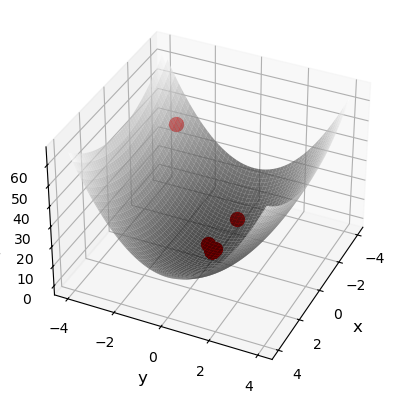

In [20]:
#Gradient Decent

#Define the xy dimesnions
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

#build an xy mesh
X, Y = np.meshgrid(x, y)

#define the quadratic form of the Ax=b linear system of equation, i.e., the
#surface that defines it. 
f = X**2+3*Y**2;

#show the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f,cmap='gray', alpha=0.7)

#suggest random initial values for both variables
x0 = -3
y0 = -3

#calculate the initial funciton, i.e., the point that corresponds to the
#random initial point
f0 = x0**2+3*y0**2

#plot the first random point on the surface
ax.scatter(x0,y0,f0, s=100, color='red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('f(x,y)', fontsize=12)

# Adjust the viewing perspective if needed
ax.view_init(elev=35, azim=25)

#iterate until the minimum of the surface is reached 
#or the convergence threshold is achieved.
Num_steps = 100
    
for i in range(Num_steps):
    #define the step size
    tau = (x0**2+9*y0**2)/(2*x0**2+54*y0**2)
    
    #calculate future steps
    xnew = (1-2*tau)*x0
    ynew = (1-6*tau)*y0
    fnew = xnew**2+3*ynew**2
    
    #show the iterated point on the 3D plot
    ax.scatter(xnew,ynew,fnew, s=100, color='red')
    
    #update the x,y values for the next iteration
    x0 = xnew
    y0 = ynew
    
    #%if the tolerance between each points exit the iteration cycle.
    if abs(fnew-f0)<1.E-8:
        break
    
x0,y0 

********************************************************************************

MATLAB® and NumPy have a lot in common, but NumPy was created to work with Python, not to be a MATLAB clone. This guide will help MATLAB users get started with NumPy.
https://numpy.org/doc/stable/user/numpy-for-matlab-users.html